<a href="https://colab.research.google.com/github/mushir2004/Quantum-Enhanced-Carbon-Footprint-Tracker-/blob/main/Carbon_Footprint_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install scikit-learn pandas numpy matplotlib seaborn


In [106]:
pip install qiskit


In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# Load your dataset (you can replace this with a relevant carbon dataset)
df = pd.read_csv('/content/synthetic_carbon_footprint_data_1000_samples.csv')

# Display the first few rows of the dataset
df.head()


,energy_usage,transport_distance,food_consumption,waste_management,carbon_footprint
0,202,82,36,2,127.2
1,535,30,15,9,187.8
2,960,79,27,16,349.6
3,370,91,30,13,180.1
4,206,179,38,9,179.7


In [110]:
# Drop rows with missing values
df = df.dropna()

# Define feature variables (X) and target variable (y)
X = df[['energy_usage', 'transport_distance', 'food_consumption', 'waste_management']]
y = df['carbon_footprint']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 37.265632644999975


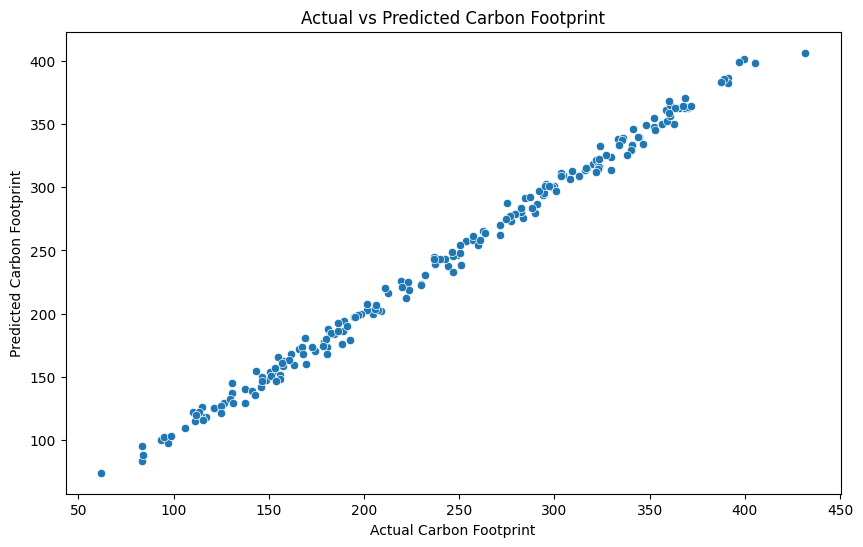

In [112]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Carbon Footprint')
plt.ylabel('Predicted Carbon Footprint')
plt.title('Actual vs Predicted Carbon Footprint')
plt.show()


In [113]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9928246022321012


In [114]:
# Creating a new feature: Energy per km of transport
df['energy_per_km'] = df['energy_usage'] / df['transport_distance']


In [115]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.99460762 0.99346184 0.99420767 0.99411275 0.99464991]
Mean CV Score: 0.9942079583301714


In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict and evaluate
gbr_pred = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)

print(f'Gradient Boosting Mean Squared Error: {gbr_mse}')


Gradient Boosting Mean Squared Error: 19.178893276415366


In [117]:
pip install pylatexenc

In [118]:
pip install matplotlib


In [ ]:
!pip install qiskit matplotlib


In [119]:
# Import necessary libraries
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a quantum feature map
def quantum_feature_map(data):
    num_qubits = len(data[0])  # Number of features
    circuit = QuantumCircuit(num_qubits)

    for i in range(num_qubits):
        circuit.rx(data[0][i], i)  # Encoding the first sample

    return circuit

# Example usage
# Creating synthetic data
data = {
    'energy_usage': [300, 450, 600],
    'transport_distance': [20, 50, 100],
    'food_consumption': [10, 25, 30],
    'waste_management': [5, 10, 15],
}

# Creating a DataFrame
df = pd.DataFrame(data)
X_train = df.values  # Use the DataFrame values as input data

# Reshape the first sample to match the input
sample_data = X_train[0].reshape(1, -1)

# Create the quantum feature map circuit
qc = quantum_feature_map(sample_data)

# Visualize the quantum circuit using 'text' format
print(qc.draw('text'))  # Print circuit in text format

# Alternatively, visualize using 'latex' if you want better formatting
# from qiskit.visualization import plot_bloch_multivector
# qc.draw('latex')  # If you have LaTeX support enabled
 # Use plt.show() to display the plot in Colab




     ┌─────────┐
q_0: ┤ Rx(300) ├
     └┬────────┤
q_1: ─┤ Rx(20) ├
      ├────────┤
q_2: ─┤ Rx(10) ├
      ├───────┬┘
q_3: ─┤ Rx(5) ├─
      └───────┘ 


In [ ]:
from qiskit import QuantumCircuit

# Test the import
qc = QuantumCircuit(1)
qc.h(0)  # Apply a Hadamard gate
qc.measure_all()  # Measure the qubit
print(qc.draw('text'))


        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 


In [120]:
# Import necessary libraries
from qiskit import QuantumCircuit
import pandas as pd

# Function to create a quantum feature map
def quantum_feature_map(data):
    num_qubits = len(data[0])  # Number of features
    circuit = QuantumCircuit(num_qubits)

    for i in range(num_qubits):
        circuit.rx(data[0][i], i)  # Encoding the first sample

    return circuit

# Carbon Footprint Calculation (simplified for now)
def calculate_carbon_footprint(energy, transport, food, waste):
    # Formula to calculate the carbon footprint (example)
    carbon_footprint = (energy * 0.5) + (transport * 0.3) + (food * 0.15) + (waste * 0.05)
    return carbon_footprint

# Quantum Adjusted Carbon Footprint Calculation (you can integrate quantum operations here)
def quantum_adjusted_carbon_footprint(data):
    quantum_circuit = quantum_feature_map(data)  # Create the quantum circuit based on the data
    print("Quantum Circuit:\n")
    print(quantum_circuit.draw('text'))  # Print the quantum circuit

    # For this example, we'll just adjust the carbon footprint by a constant factor
    adjusted_factor = 0.9  # Example adjustment factor
    return adjusted_factor

# Example data (input from user)
data = {
    'energy_usage': [300, 450, 600],
    'transport_distance': [20, 50, 100],
    'food_consumption': [10, 25, 30],
    'waste_management': [5, 10, 15],
}

# Convert data to a DataFrame and extract the first sample
df = pd.DataFrame(data)
X_train = df.values  # Use the DataFrame values as input data
sample_data = X_train[0].reshape(1, -1)

# Calculate the original and quantum-adjusted carbon footprint
original_footprint = calculate_carbon_footprint(300, 20, 10, 5)
adjusted_footprint = original_footprint * quantum_adjusted_carbon_footprint(sample_data)

# Display results
print(f"Original Carbon Footprint: {original_footprint}")
print(f"Quantum-Adjusted Carbon Footprint: {adjusted_footprint}")


Quantum Circuit:

     ┌─────────┐
q_0: ┤ Rx(300) ├
     └┬────────┤
q_1: ─┤ Rx(20) ├
      ├────────┤
q_2: ─┤ Rx(10) ├
      ├───────┬┘
q_3: ─┤ Rx(5) ├─
      └───────┘ 
Original Carbon Footprint: 157.75
Quantum-Adjusted Carbon Footprint: 141.975


In [121]:
# Take user input
energy_usage = float(input("Enter your energy usage (in kWh): "))
transport_distance = float(input("Enter your transport distance (in km): "))
food_consumption = float(input("Enter your food consumption (in kg): "))
waste_management = float(input("Enter your waste management output (in kg): "))

# Calculate and print the carbon footprint based on user input
original_footprint = calculate_carbon_footprint(energy_usage, transport_distance, food_consumption, waste_management)
adjusted_footprint = original_footprint * quantum_adjusted_carbon_footprint(sample_data)

# Display results
print(f"\nOriginal Carbon Footprint: {original_footprint}")
print(f"Quantum-Adjusted Carbon Footprint: {adjusted_footprint}")


Enter your energy usage (in kWh): 55
Enter your transport distance (in km): 33
Enter your food consumption (in kg): 99
Enter your waste management output (in kg): 66
Quantum Circuit:

     ┌─────────┐
q_0: ┤ Rx(300) ├
     └┬────────┤
q_1: ─┤ Rx(20) ├
      ├────────┤
q_2: ─┤ Rx(10) ├
      ├───────┬┘
q_3: ─┤ Rx(5) ├─
      └───────┘ 

Original Carbon Footprint: 55.55
Quantum-Adjusted Carbon Footprint: 49.995
